# Project Overview: 
This project analyzes whether Fandango’s 2015 movie ratings were biased or inflated compared to other platforms. Using Python, Pandas, and visualization tools, we explore if Fandango rated movies higher to drive ticket sales.(Real World Project)
### Created By: Dev Moddh

Data Source: https://github.com/fivethirtyeight/data/tree/master/fandango

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fandango = pd.read_csv("fandango_scrape.csv")
others = pd.read_csv("all_sites_scores.csv")

In [5]:
fandango.head() 
# Fandango provides precise numeric scores which is RATING and a rounded off rating which is STARS in out dataset.

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
others.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [7]:
fandango.shape

(504, 4)

In [8]:
others.shape 
# So there are less movies in others dataset. So we will need data exploration and data cleaning.

(146, 8)

In [9]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [10]:
others.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [11]:
fandango[fandango['STARS']==0]

,FILM,STARS,RATING,VOTES
435,6 Years (2015),0.0,0.0,0
436,7 Minutes (2015),0.0,0.0,0
437,A Year in Champagne (2015),0.0,0.0,0
438,Balls Out (2015),0.0,0.0,0
439,Before I Wake (2015),0.0,0.0,0
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [12]:
# Removing all the rows which has STARS <= 0
fandango = fandango[fandango['STARS']>0]

In [13]:
fandango.shape

(435, 4)

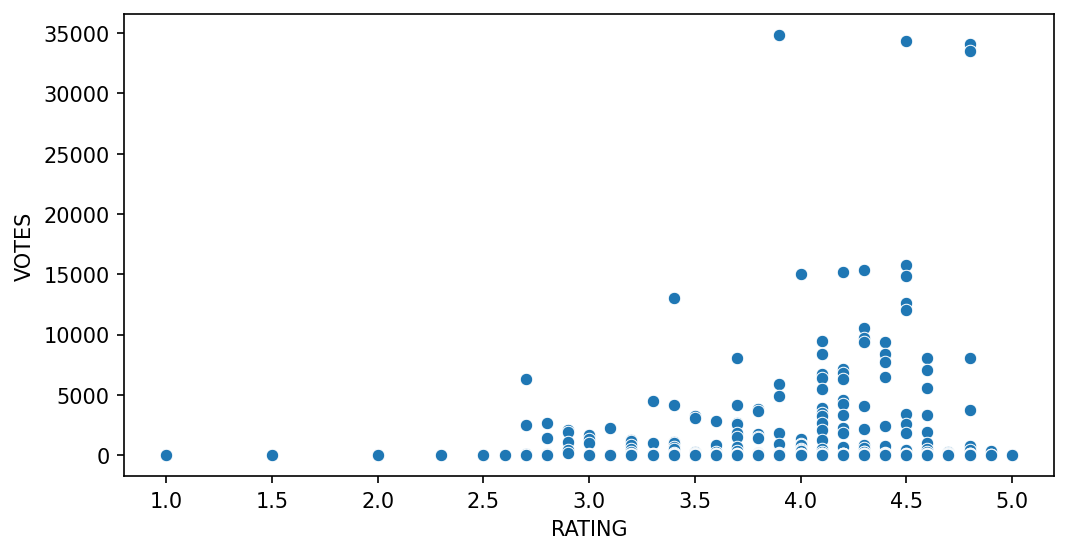

In [14]:
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

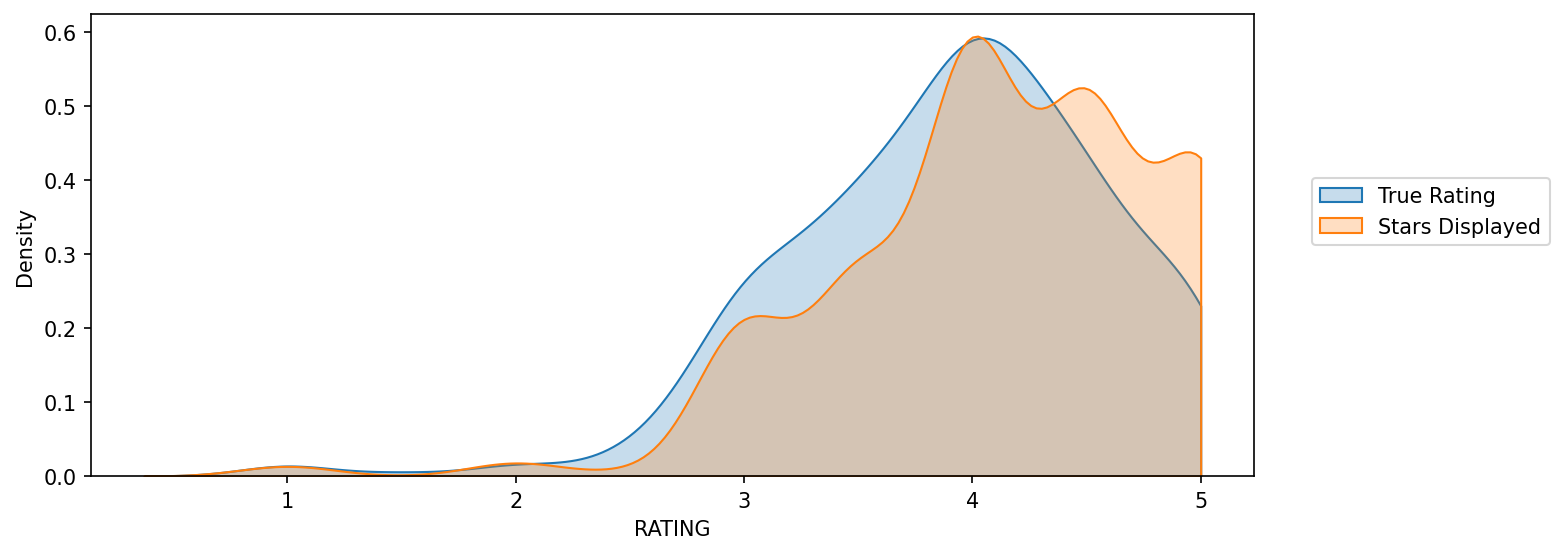

In [16]:
# As per above scatterplot data is highly concentrated on 2.5 to 5 RATING
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fandango,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fandango,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

In [17]:
fandango[abs((fandango['STARS']-fandango['RATING'])>0.5)]
# It seems like a very big change in STARS and RATING in one dataset.

,FILM,STARS,RATING,VOTES
381,Turbo Kid (2015),5.0,4.0,2


In [18]:
# Making rotten tomatoes rating, metacritic and imdb scale in 0 to 5.
updated_others = others.copy()

In [19]:
updated_others['RottenTomatoes'] = others['RottenTomatoes'] / 20
updated_others['RottenTomatoes_User'] = others['RottenTomatoes_User'] / 20
updated_others['Metacritic'] = others['Metacritic'] / 20
updated_others['Metacritic_User'] = others['Metacritic_User'] / 2
updated_others['IMDB'] = others['IMDB'] / 2

In [20]:
updated_others.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),3.70,4.3,3.30,3.55,3.90,1330,271107
1,Cinderella (2015),4.25,4.0,3.35,3.75,3.55,249,65709
2,Ant-Man (2015),4.00,4.5,3.20,4.05,3.90,627,103660
3,Do You Believe? (2015),0.90,4.2,1.10,2.35,2.70,31,3136
4,Hot Tub Time Machine 2 (2015),0.70,1.4,1.45,1.70,2.55,88,19560


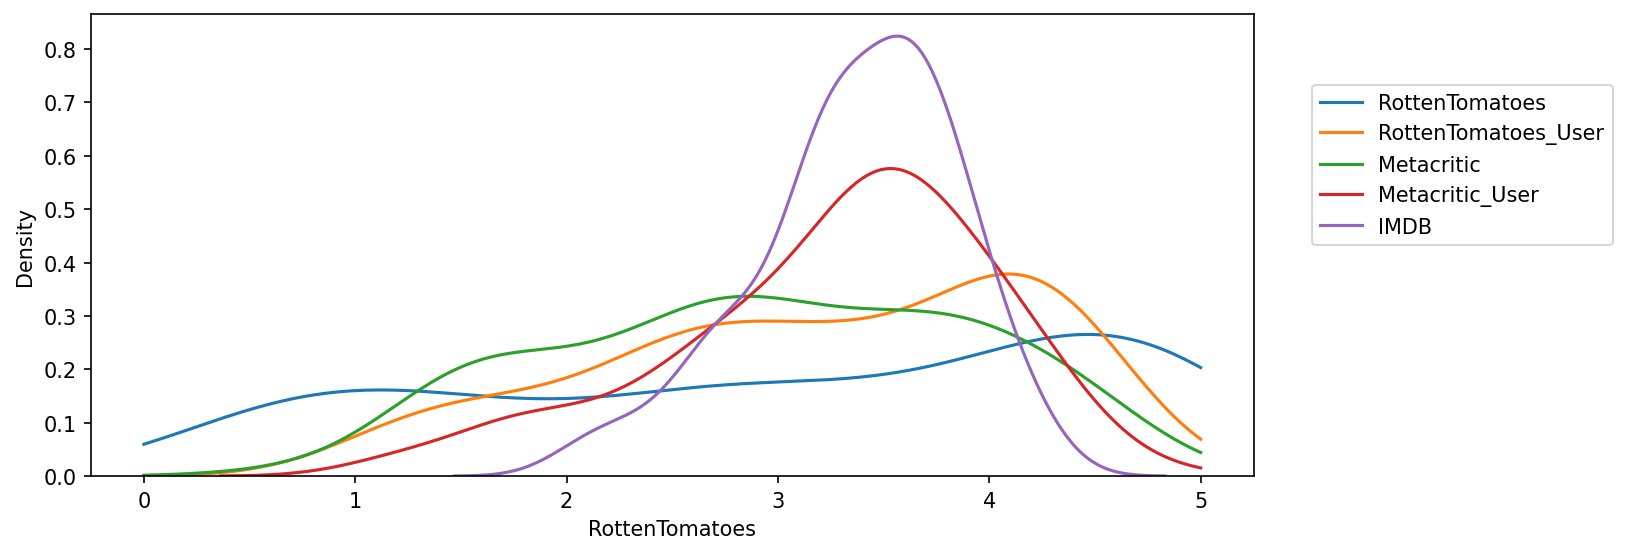

In [21]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=updated_others,x='RottenTomatoes',clip=[0,5],label='RottenTomatoes')
sns.kdeplot(data=updated_others,x='RottenTomatoes_User',clip=[0,5],label='RottenTomatoes_User')
sns.kdeplot(data=updated_others,x='Metacritic',clip=[0,5],label='Metacritic')
sns.kdeplot(data=updated_others,x='Metacritic_User',clip=[0,5],label='Metacritic_User')
sns.kdeplot(data=updated_others,x='IMDB',clip=[0,5],label='IMDB')

plt.legend(loc=(1.05,0.5))
# It seems like IMDB ratings are also concentrated 2 to 5 scale.

## Analyses on RottenTomatoes and Metacritic reviews:

In [77]:
updated_others[abs((updated_others['RottenTomatoes_User']-updated_others['RottenTomatoes'])>1)].count()
# There are 26 FILM which has more than 1 difference in review from RottenTomatoes_User and RottenTomatoes.

FILM                          26
RottenTomatoes                26
RottenTomatoes_User           26
Metacritic                    26
Metacritic_User               26
IMDB                          26
Metacritic_user_vote_count    26
IMDB_user_vote_count          26
dtype: int64

In [81]:
updated_others[abs((updated_others['Metacritic_User']-updated_others['Metacritic'])>1)].count()
# There are 20 FILM which has more than 1 difference in review from Metacritic_User and Metacritic.

FILM                          20
RottenTomatoes                20
RottenTomatoes_User           20
Metacritic                    20
Metacritic_User               20
IMDB                          20
Metacritic_user_vote_count    20
IMDB_user_vote_count          20
dtype: int64

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

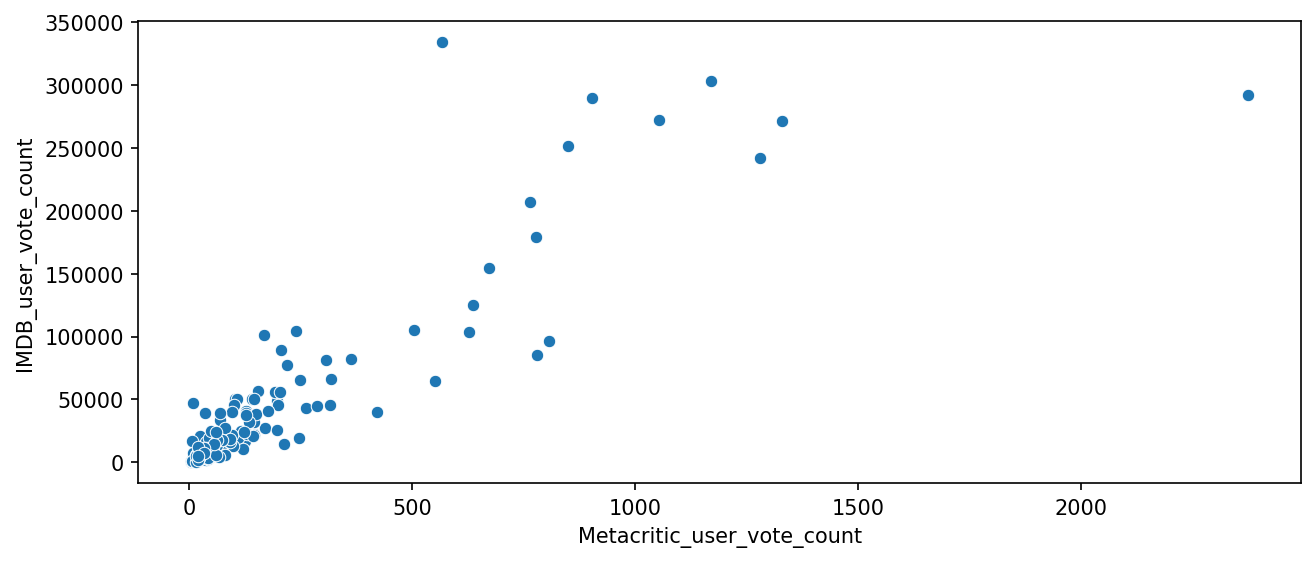

In [83]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=updated_others,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

# Fandago Scores vs. All Sites

In [86]:
df = pd.merge(fandango,updated_others,on='FILM',how='inner')
# Using inner merge So that only common movies from both the dataset merges.

In [88]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,1.25,2.10,2.30,1.60,2.10,778,179506
1,Jurassic World (2015),4.5,4.5,34390,3.55,4.05,2.95,3.50,3.65,1281,241807
2,American Sniper (2015),5.0,4.8,34085,3.60,4.25,3.60,3.30,3.70,850,251856
3,Furious 7 (2015),5.0,4.8,33538,4.05,4.20,3.35,3.40,3.70,764,207211
4,Inside Out (2015),4.5,4.5,15749,4.90,4.50,4.70,4.45,4.30,807,96252


In [94]:
df.shape

(145, 11)

In [96]:
all_ratings = df[['STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User','IMDB']]

In [98]:
all_ratings.head()

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30


In [104]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

### The above function is copied from https://github.com/mwaskom/seaborn/issues/2280

/var/folders/6t/lchwtjbd7w51_6z67b3l2fpc0000gn/T/ipykernel_90326/3707310288.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


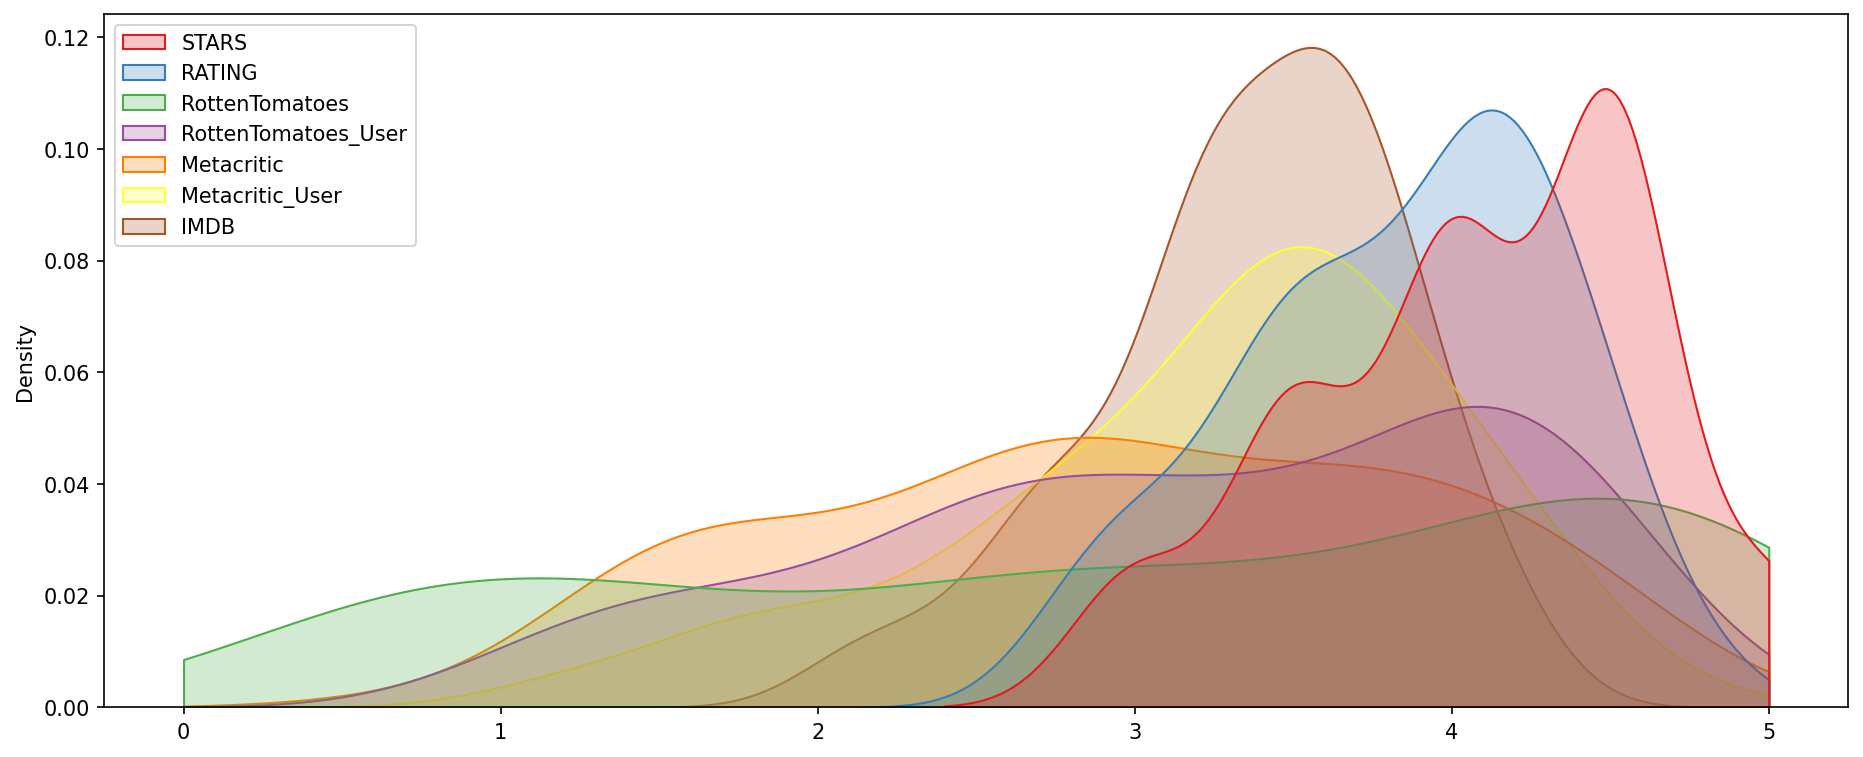

In [108]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=all_ratings,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

/var/folders/6t/lchwtjbd7w51_6z67b3l2fpc0000gn/T/ipykernel_90326/3707310288.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


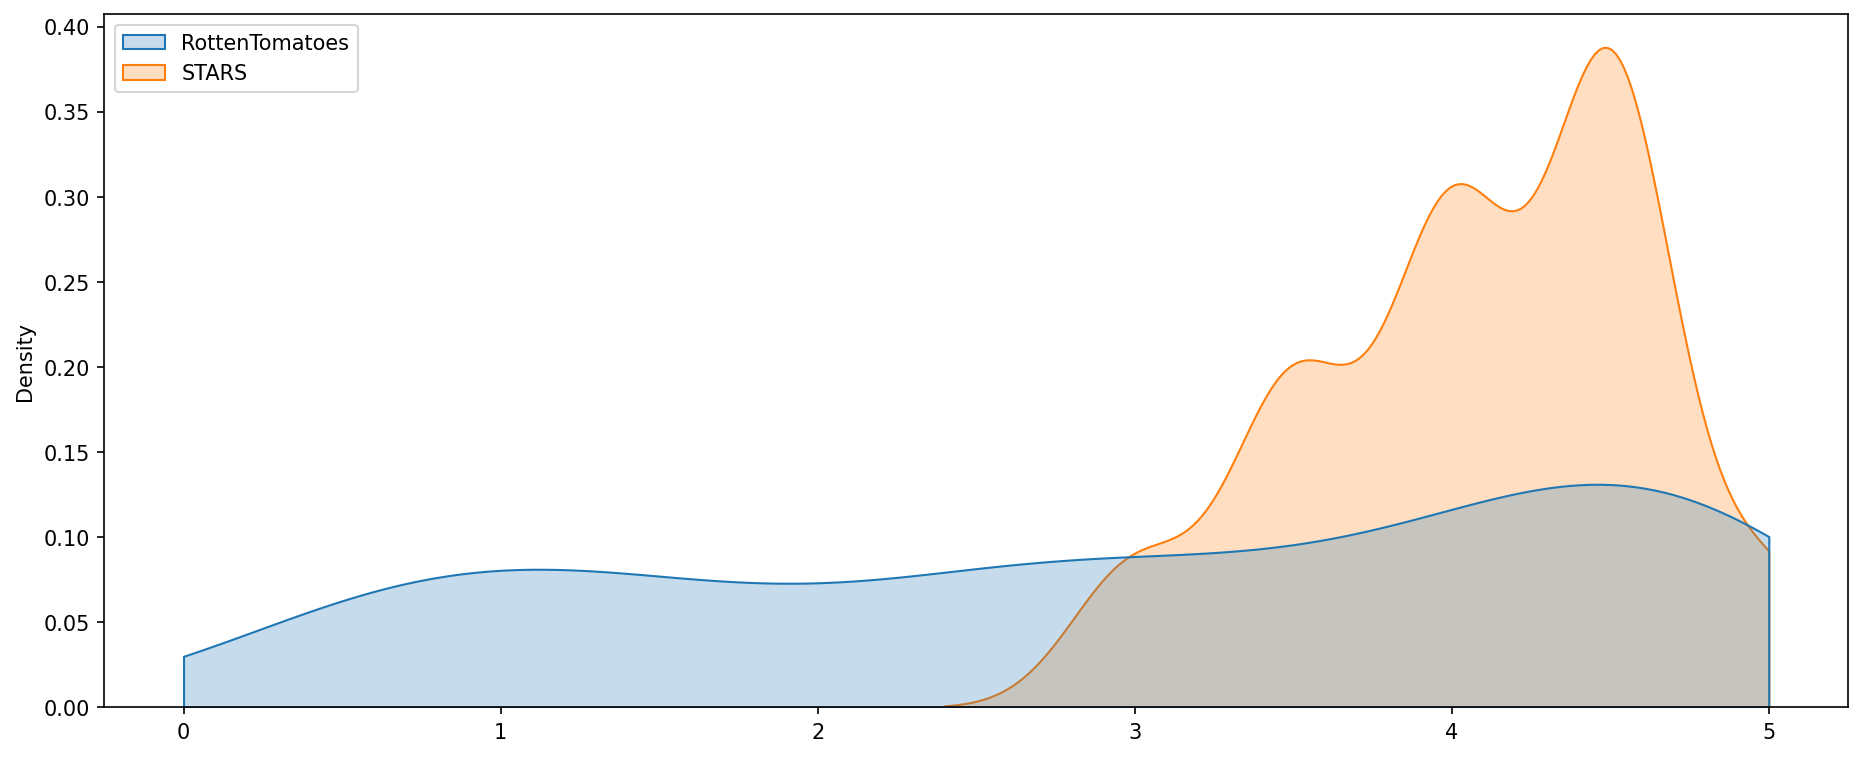

In [116]:
# Clearly RottenTomatoes has best uniformly distributed rating. So,lets compare it directly with STARS by Fandango.
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=all_ratings[['RottenTomatoes','STARS']],clip=[0,5],shade=True,ax=ax)
move_legend(ax, "upper left")

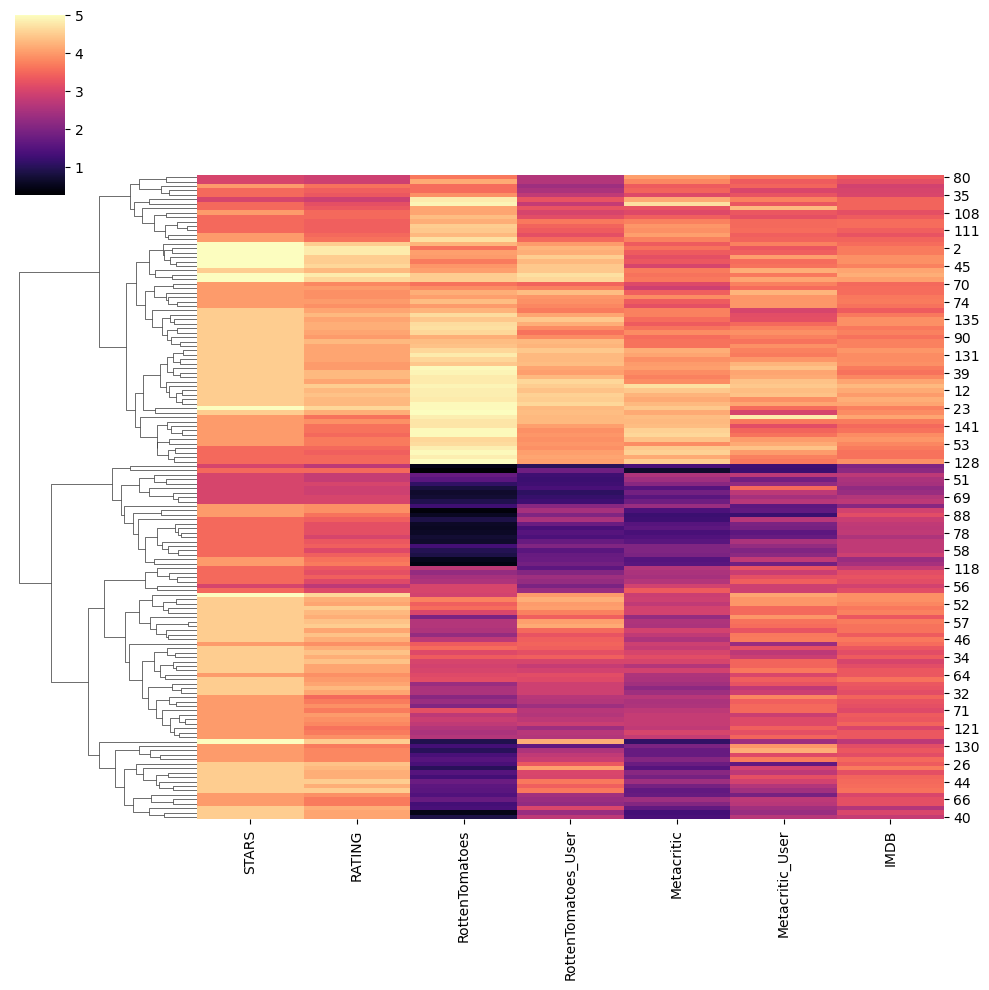

In [124]:
sns.clustermap(all_ratings,cmap='magma',col_cluster=False)
# To identify how poorly rated movies are scored across different platforms, a clustermap of normalized ratings is created.

# Final thoughts: Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!